# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [7]:
print(cities[1:5])


['vaini', 'torbay', 'vanimo', 'talnakh']


### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# example request
#req = requests.get(base_url + f'&q={cities[1]}').json()
city_weather_list=[]

# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 
for n in range(len(cities)):
    newreq = requests.get(base_url + f'&q={cities[n]}').json()
    #print(newreq)
    #print(type(newreq))
    if 'city not found' in newreq.values():
        print("City not found")
    else:
        city_weather_list.append(newreq)
        print("City name: ", newreq['name'], " City ID: ", newreq['id'])
    


City name:  Chui  City ID:  3443061
City name:  Vaini  City ID:  4032243
City name:  Torbay  City ID:  6167817
City name:  Vanimo  City ID:  2084442
City name:  Talnakh  City ID:  1490256
City name:  George Town  City ID:  1735106
City name:  Naryan-Mar  City ID:  523392
City name:  Rikitea  City ID:  4030556
City name:  Codrington  City ID:  2171099
City name:  Kapaa  City ID:  5848280
City name:  Makamba  City ID:  422232
City name:  Faanui  City ID:  4034551
City name:  Natitingou  City ID:  2392601
City name:  Puerto Ayora  City ID:  3652764
City name:  Clyde River  City ID:  5924351
City not found
City name:  Ushuaia  City ID:  3833367
City name:  Severo-Kuril'sk  City ID:  2121385
City name:  Husavik  City ID:  2629833
City name:  Turtas  City ID:  1540475
City name:  Tuktoyaktuk  City ID:  6170031
City name:  Mahébourg  City ID:  934322
City name:  Vestmannaeyjar  City ID:  3412093
City name:  Naze  City ID:  1855540
City name:  Punta Arenas  City ID:  3874787
City name:  Ponta 

City name:  Tongzi  City ID:  1799686
City not found
City name:  Aklavik  City ID:  5882953
City name:  Inírida  City ID:  3671450
City name:  Balabac  City ID:  1728675
City not found
City name:  Pasco  City ID:  4167895
City not found
City name:  Lavrentiya  City ID:  4031637
City name:  Constitución  City ID:  3893726
City name:  Roebourne  City ID:  2062276
City name:  Rumoi  City ID:  2128382
City name:  Bang Saphan  City ID:  1157662
City name:  Hamilton  City ID:  4513583
City name:  Manadhoo  City ID:  1337618
City name:  Tateyama  City ID:  1850523
City name:  Diamantino  City ID:  3464724
City name:  Nouadhibou  City ID:  2377457
City name:  Lebu  City ID:  3883457
City name:  Kansk  City ID:  1504682
City name:  Al Bardīyah  City ID:  80509
City name:  Narsaq  City ID:  3421719
City not found
City name:  Urubichá  City ID:  3901969
City name:  Aginskoye  City ID:  2028078
City name:  Sulzbach-Rosenberg  City ID:  2824801
City name:  Upington  City ID:  945945
City name:  Don

City name:  Coxim  City ID:  3465228
City name:  Chālūs  City ID:  139223
City name:  Bushehr  City ID:  139817
City name:  Lasem  City ID:  1638352
City name:  Caucayá  City ID:  3671437
City name:  Joensuu  City ID:  655808
City name:  Thanh Hoa  City ID:  1566166
City name:  São Borja  City ID:  3449340
City name:  Palmas  City ID:  3474574
City name:  Usinsk  City ID:  863061
City name:  Limenaria  City ID:  735418
City name:  Stavyshche  City ID:  692672
City name:  Namatanai  City ID:  2090021
City name:  Portland  City ID:  5746545
City name:  Córdoba  City ID:  3860259
City name:  Oistins  City ID:  3373652
City name:  Boundiali  City ID:  2290836
City name:  Leningradskiy  City ID:  2123814
City name:  Okhotsk  City ID:  2122605
City name:  Marabba  City ID:  370510
City name:  Kuandian  City ID:  2036283
City name:  Coyhaique  City ID:  3894426
City name:  Morón  City ID:  3430545
City name:  Bex  City ID:  2661527
City name:  Hobyo  City ID:  57000
City name:  Aleysk  City I

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [9]:
#define empty lists for all wanted fields
city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lon=[]
max_temp=[]
wind_speed=[]

#iterate through all cities and get the necessary data as lists
for n in range(len(city_weather_list)):
    city.append(city_weather_list[n]['name'])
    cloudiness.append(city_weather_list[n]['clouds']['all'])
    country.append(city_weather_list[n]['sys']['country'])
    date.append(city_weather_list[n]['dt'])
    humidity.append(city_weather_list[n]['main']['humidity'])
    lat.append(city_weather_list[n]['coord']['lat'])
    lon.append(city_weather_list[n]['coord']['lon'])
    max_temp.append(city_weather_list[n]['main']['temp_max'])
    wind_speed.append(city_weather_list[n]['wind']['speed'])

#Create a dataframe out of lists    
d={"City":city,"Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lon":lon, "Max Temp":max_temp, "Wind Speed": wind_speed}
city_weather_df=pd.DataFrame(d)

    

In [10]:
#Make sure data looks as expected by printing out the first 5 lines of the dataframe
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Chui,8,UY,1617754734,89,-33.6971,-53.4616,67.26,7.52
1,Vaini,20,TO,1617754734,69,-21.2000,-175.2000,80.60,9.22
2,Torbay,90,CA,1617754735,100,47.6666,-52.7314,37.00,9.22
3,Vanimo,99,PG,1617754736,85,-2.6741,141.3028,79.93,3.47
4,Talnakh,94,RU,1617754737,99,69.4865,88.3972,11.50,3.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

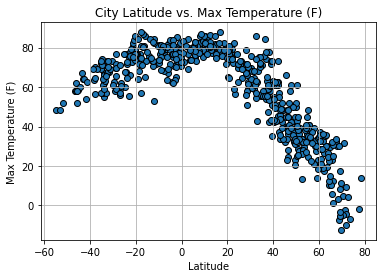

In [14]:
#Create Latitude vs. Temperature Plot
plt.scatter(city_weather_df['Lat'],city_weather_df['Max Temp'], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F)")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

1617754734
2021-04-07 00:18:54.000000+00:00 (UTC)
2021-04-07 00:18:54


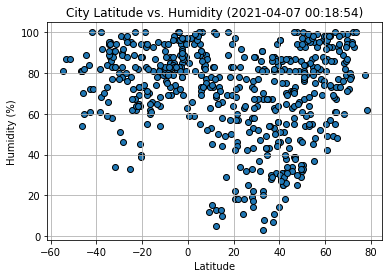

In [22]:
#Create latitude vs. humidity plot
#Convert unix time to UTC time
from datetime import datetime
print(date[0])
utc_time = datetime.utcfromtimestamp(date[0])
print(utc_time.strftime("%Y-%m-%d %H:%M:%S.%f+00:00 (UTC)"))
print(utc_time)
#create scatter plot
plt.scatter(city_weather_df['Lat'],city_weather_df['Humidity'], edgecolors='black')
#set axes labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (" + str(utc_time) + ")")
#turn on gridlines
plt.grid(True)
#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

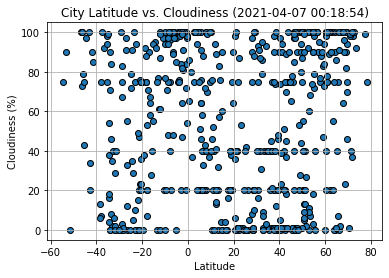

In [23]:
#Create latitude vs. cloudiness plot
#create scatter plot
plt.scatter(city_weather_df['Lat'],city_weather_df['Cloudiness'], edgecolors='black')
#set axes labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (" + str(utc_time) + ")")
#turn on gridlines
plt.grid(True)
#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

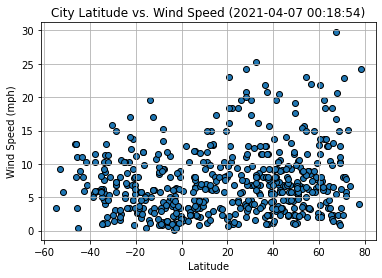

In [24]:
#Create latitude vs. windspeed plot
#create scatter plot
plt.scatter(city_weather_df['Lat'],city_weather_df['Wind Speed'], edgecolors='black')
#set axes labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (" + str(utc_time) + ")")
#turn on gridlines
plt.grid(True)
#show plot
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

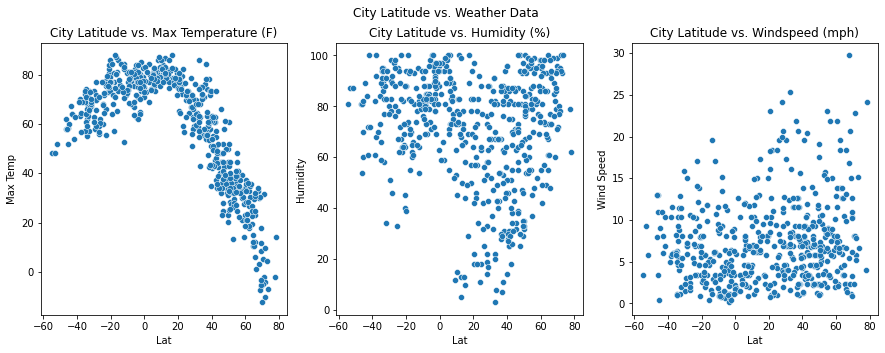

In [40]:
import seaborn as sns
#create a set of 3 subplots using seaborn
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True)
fig.suptitle('City Latitude vs. Weather Data')
axes[0].set_title('City Latitude vs. Max Temperature (F)')
axes[1].set_title('City Latitude vs. Humidity (%)')
axes[2].set_title('City Latitude vs. Windspeed (mph)')
sns.scatterplot(ax=axes[0], x='Lat', y='Max Temp', data=city_weather_df)
sns.scatterplot(ax=axes[1], x='Lat', y='Humidity', data=city_weather_df)
sns.scatterplot(ax=axes[2], x='Lat', y='Wind Speed', data=city_weather_df)
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

# Summary of Findings
The plot of maximum temperature vs. latitude shows that maximum temperature is greatest around the equator (0 degrees latitude) and decreases as cities get further away from the equator.  The other data is all data collected from April 7th 2021, so it may not be consistent throughout the year, however, for this date, there are relatively high humidity levels for the cities that were sampled that are found around the equator and lower humidity values for several cities that are found from about 20 to 40 degrees latitude. There is still a lot of variability, however, between latitude and humidity, and those cities that were sampled that do fall between 20 and 40 degrees latitude fall from very low humidity (near 5%) to very high humidity (near 95%). For the sampled date, there did not appear to be a strong pattern between wind speed and latitude.  Most cities that were sampled, across all latitudes, had wind speeds of under 10 mph.  No cities that were close to the equator had wind speeds greater than around 13 mph, while several cities between 20 and 80 degrees latitude had wind speeds over 15 mph.    

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 